In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statistics as stat
from statistics import mode
from scipy import stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from re import S
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from mlxtend.preprocessing import minmax_scaling

In [6]:
#carga archivo
df_tortilla = pd.read_csv('C:/Users/ado_h/Documents/Python Scripts/tortilla_prices.csv')

#Muestra primeras filas del archivo
print(df_tortilla.head())

                 State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
1      Baja California        Mexicali  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   

   Price per kilogram  
0                 9.9  
1                 NaN  
2                10.0  
3                10.0  
4                10.0  


In [7]:
missing_values_count = df_tortilla.isnull().sum()

missing_values_count

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64

In [8]:
df_tortilla.describe()

,Year,Month,Day,Price per kilogram
count,289146.000000,289146.000000,289146.000000,282756.000000
mean,2015.396530,6.387562,15.926020,12.328397
std,5.098867,3.403531,8.747078,4.615283
min,2007.000000,1.000000,1.000000,0.000000
25%,2011.000000,3.000000,8.000000,9.640000
50%,2015.000000,6.000000,16.000000,11.290000
75%,2020.000000,9.000000,24.000000,14.230000
max,2024.000000,12.000000,31.000000,31.000000


In [9]:
# ¿Cuántos valores faltantes totales tenemos?
total_cells = np.product(df_tortilla.shape)
total_missing = missing_values_count.sum()

# porcentaje de datos que faltan
percent_missing = (total_missing/total_cells)*100
print(percent_missing )

0.315708030841562


In [84]:
# obtener un duplicado del conjunto de datos
copy_df_tortilla = df_tortilla.copy()
copy_df_tortilla

# reemplazamos los NA por el valor que viene directamente después de él en la misma columna,
# luego reemplace todos los na restantes con 0
copy_df_tortilla_2 = copy_df_tortilla.fillna(12.32)#.fillna(0) / fillna(method='bfill')

In [86]:
missing_values_count = df_tortilla.isnull().sum()
missing_values_count_2 = copy_df_tortilla_2.isnull().sum()

print(missing_values_count)
print(missing_values_count_2)

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64
State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64


In [12]:
copy_df_tortilla_2.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,9.9
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [13]:
df_g1=copy_df_tortilla_2.loc[:,['Year','Price per kilogram']]
df_g1 = df_g1.groupby(['Year']).mean()
df_g1.head()

df_g1.columns

Index(['Price per kilogram'], dtype='object')

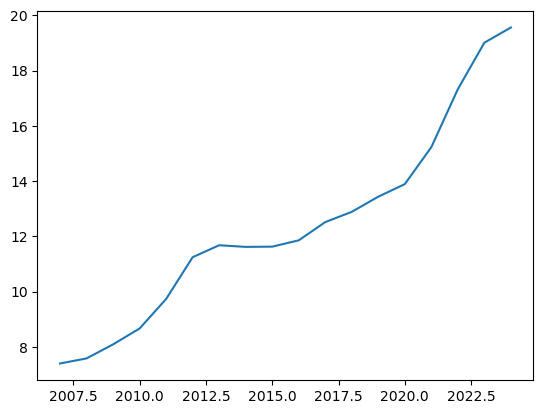

In [14]:
plt.plot(df_g1)

In [15]:
df_g2=copy_df_tortilla_2.loc[:,['State','Year','Price per kilogram']]
#df_g2 = df_g2.groupby(['State','Year']).mean()
#df_g2.head()

df_g2.columns

Index(['State', 'Year', 'Price per kilogram'], dtype='object')

<Axes: xlabel='Year', ylabel='Price per kilogram'>

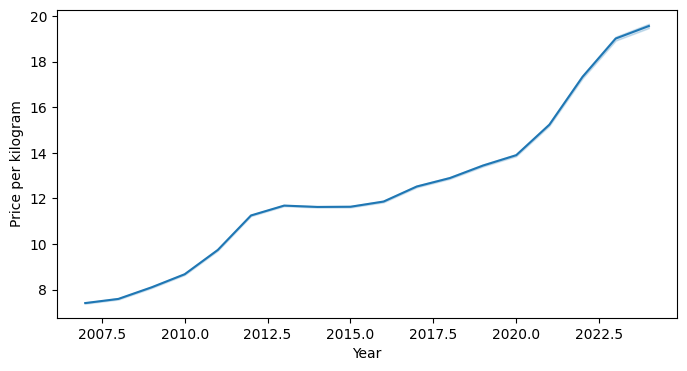

In [148]:
fig, ax = plt.subplots(figsize=(8, 4))
#sns.lineplot(data=df_g2, x='Year', y='Price per kilogram', hue='State', ax=ax)
sns.lineplot(data=df_g2, x='Year', y='Price per kilogram', ax=ax)


In [16]:
df_tort_oax = df_tortilla[df_tortilla['State']=='Oaxaca']
print(df_tort_oax.head())

      State    City  Year  Month  Day         Store type  Price per kilogram
29   Oaxaca  Oaxaca  2007      1   10  Mom and Pop Store                 8.2
82   Oaxaca  Oaxaca  2007      1   12  Mom and Pop Store                 8.0
135  Oaxaca  Oaxaca  2007      1   15  Mom and Pop Store                 8.2
188  Oaxaca  Oaxaca  2007      1   16  Mom and Pop Store                 8.3
241  Oaxaca  Oaxaca  2007      1   17  Mom and Pop Store                 8.3


C:\Users\ado_h\AppData\Local\Temp\ipykernel_26696\126547785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Price per kilogram", data=df_tort_oax,ax=ax, palette=paleta)
C:\Users\ado_h\AppData\Local\Temp\ipykernel_26696\126547785.py:4: UserWarning: 
The palette list has fewer values (9) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="Year", y="Price per kilogram", data=df_tort_oax,ax=ax, palette=paleta)


<Axes: title={'center': 'Precios Tortilla'}, xlabel='Year', ylabel='Price per kilogram'>

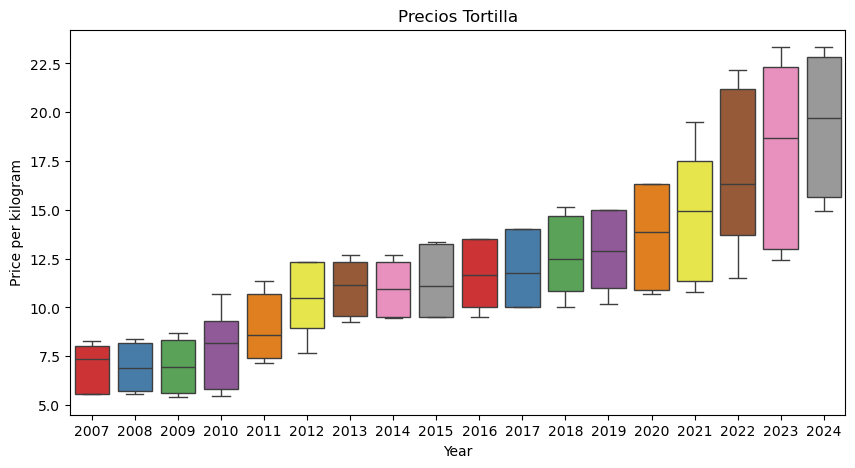

In [112]:
paleta = sns.color_palette("Set1")
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Precios Tortilla')
sns.boxplot(x="Year", y="Price per kilogram", data=df_tort_oax,ax=ax, palette=paleta) 
#sns.swarmplot(x="Year", y="Price per kilogram", data=df_tort_oax, color='black', alpha=0.5, ax=ax);

# otra forma de cambiar colores palette={"A": "blue", "B": "red","C":'#32CD32', "D":'#FFBF00'}

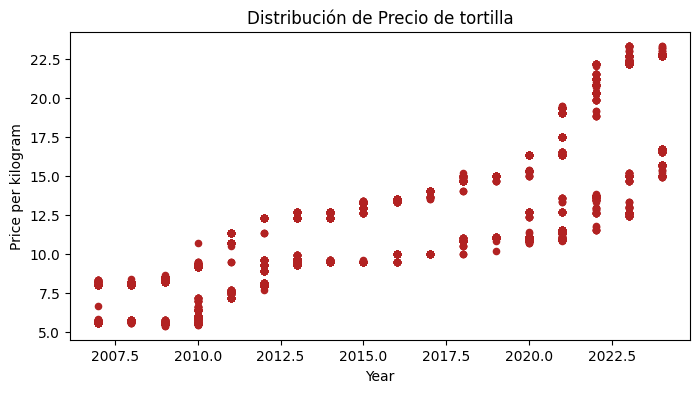

In [49]:
fig,ax = plt.subplots(figsize = (8,4))

df_tort_oax.plot(
    x='Year',
    y='Price per kilogram',
    c='firebrick',
    kind = 'scatter',
    ax=ax
)
ax.set_title('Distribución de Precio de tortilla');


In [24]:
df_tort_oax.describe()

,Year,Month,Day,Price per kilogram
count,5368.000000,5368.000000,5368.000000,5282.000000
mean,2015.362146,6.382265,15.927347,11.747702
std,5.143877,3.403644,8.747942,4.290000
min,2007.000000,1.000000,1.000000,5.400000
25%,2011.000000,3.000000,8.000000,9.170000
50%,2015.000000,6.000000,16.000000,11.000000
75%,2020.000000,9.000000,24.000000,13.700000
max,2024.000000,12.000000,31.000000,23.330000


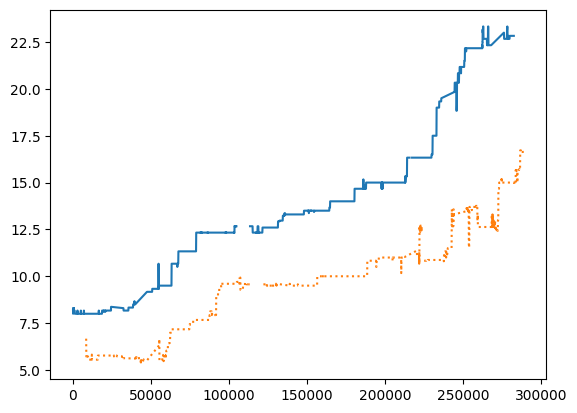

In [37]:
df_mom_pop=df_tort_oax[df_tort_oax['Store type']=='Mom and Pop Store']
df_retail= df_tort_oax[df_tort_oax['Store type']=='Big Retail Store']
anios=df_retail['Year']

plt.plot(df_mom_pop['Price per kilogram'], linestyle = 'solid')
plt.plot(df_retail['Price per kilogram'], linestyle = 'dotted')
plt.show()

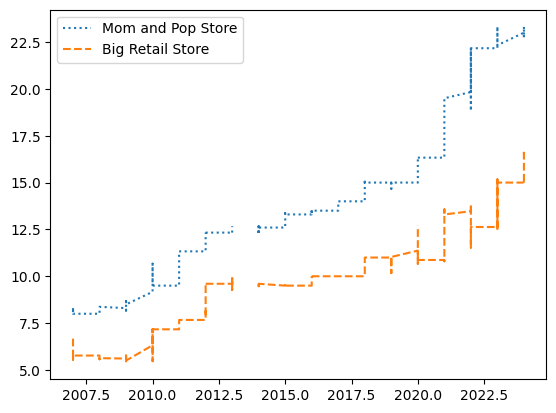

In [48]:
x= df_mom_pop['Year']
fig, ax = plt.subplots()
line1, = ax.plot(x,df_mom_pop['Price per kilogram'],label='Mom and Pop Store',ls='dotted')
line2, = ax.plot(x,df_retail['Price per kilogram'],label='Big Retail Store',ls='--')
ax.legend()
#ax.legend(handles=[line1, line2])
#ax.legend(['Mom and Pop Store','Big Retail Store'])
plt.show()

<Axes: xlabel='Year', ylabel='Price per kilogram'>

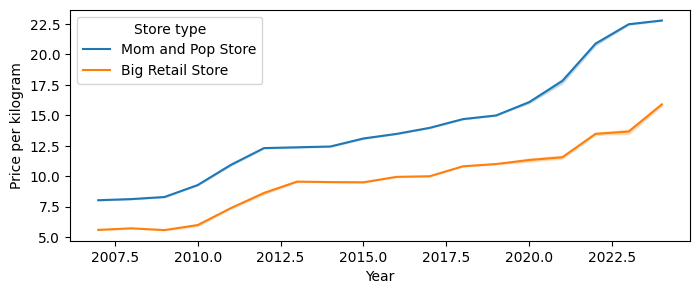

In [144]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.lineplot(data=df_tort_oax, x='Year', y='Price per kilogram', hue='Store type', ax=ax)

In [97]:
copy_df_tortilla_2.describe()

,Year,Month,Day,Price per kilogram
count,289146.000000,289146.000000,289146.000000,289146.000000
mean,2015.396530,6.387562,15.926020,12.328212
std,5.098867,3.403531,8.747078,4.564000
min,2007.000000,1.000000,1.000000,0.000000
25%,2011.000000,3.000000,8.000000,9.670000
50%,2015.000000,6.000000,16.000000,11.400000
75%,2020.000000,9.000000,24.000000,14.130000
max,2024.000000,12.000000,31.000000,31.000000


In [98]:
print(copy_df_tortilla_2.isnull().sum())

State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64


In [88]:
data = copy_df_tortilla_2
out=[]
def Zscore_outlier(df):
  n = np.mean(df)
  s = np.std(df)
  for i in df:
    z = (i-n)/s
    if np.abs(z) > 4:
      out.append(i)
  print("Outliers:", out)

#Zscore_outlier(data['Price per kilogram'])

In [89]:
Zscore_outlier(data['Price per kilogram'])

Outliers: [30.67, 30.67, 30.67, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 31.0, 30.83, 

In [90]:
data.dtypes

State                  object
City                   object
Year                    int64
Month                   int64
Day                     int64
Store type             object
Price per kilogram    float64
dtype: object

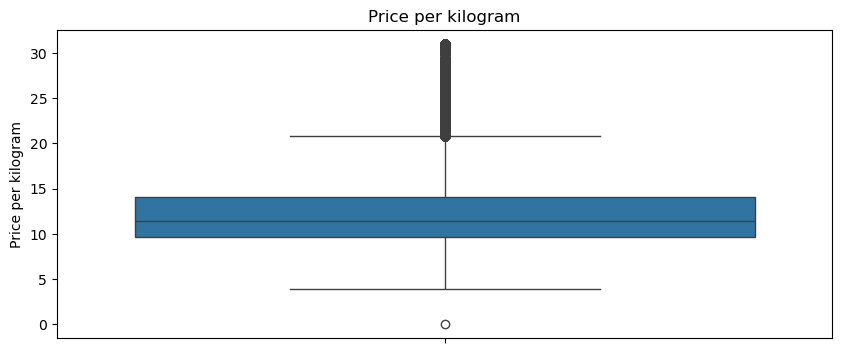

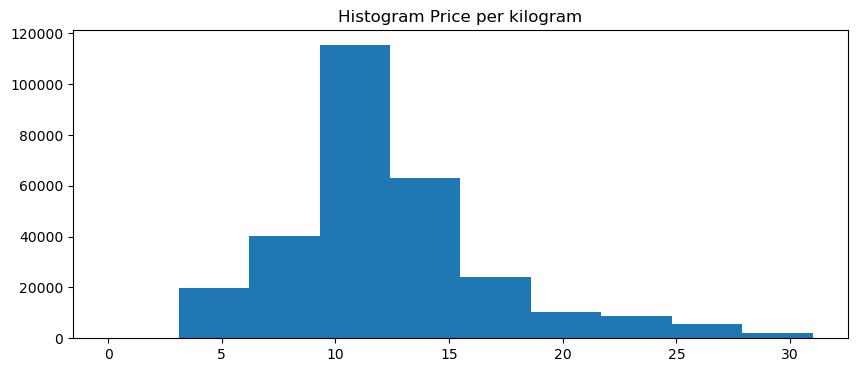

C:\Users\ado_h\AppData\Local\Temp\ipykernel_26696\1749288343.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


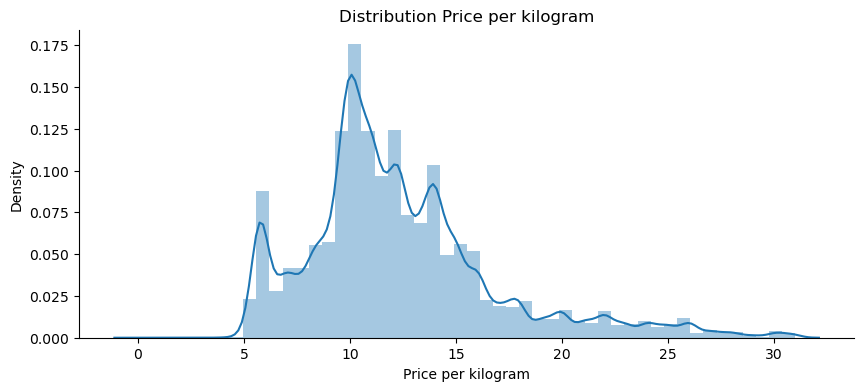

<Figure size 1000x400 with 0 Axes>

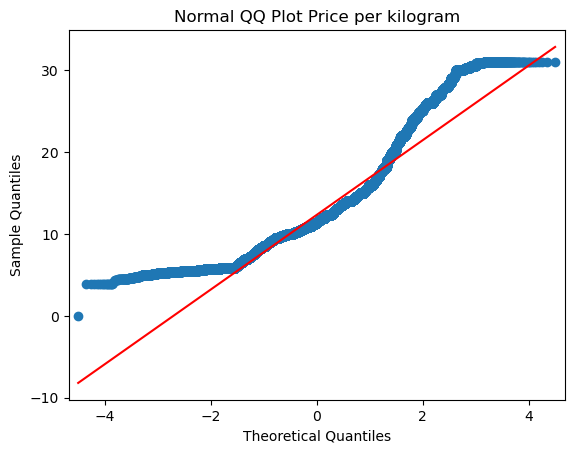

In [91]:
#Gráficas de LotFrontage
#Gráfica Boxplot
def Box_plots(df):
  plt.figure(figsize=(10,4))
  plt.title('Price per kilogram')
  sns.boxplot(df)
  plt.show()

Box_plots(data['Price per kilogram'])

#Gráfica Histograma
def hist_plots(df):
  plt.figure(figsize=(10,4))
  plt.hist(df)
  plt.title('Histogram Price per kilogram')
  plt.show()

hist_plots(data['Price per kilogram'])

#Gráfica Distribución
def dist_plots(df):
  plt.figure(figsize=(10,4))
  plt.title('Distribution Price per kilogram')
  sns.distplot(df)
  sns.despine()
  plt.show()

dist_plots(data['Price per kilogram'])

#Gráfica qq
def qq_plots(df):
  plt.figure(figsize=(10,4))
  qqplot(df,line="s")
  plt.title('Normal QQ Plot Price per kilogram')
  plt.show()

qq_plots(data['Price per kilogram'])

TypeError: 'Axes' object is not subscriptable

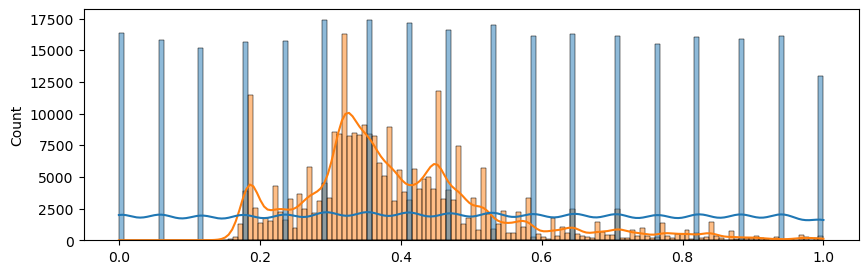

In [29]:
data2=data.loc[:,['Year','Price per kilogram']]
scaler = MinMaxScaler()
scaler.fit(data2)
scaled_data = scaler.transform(data2)

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
sns.histplot(scaled_data, kde=True, legend=False)
ax[0].set_title("Scaled data")
plt.show()

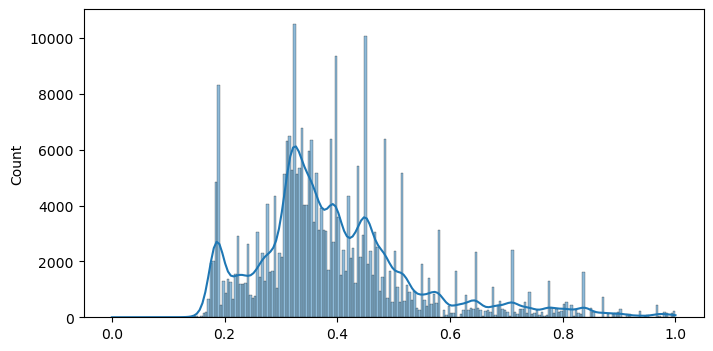

In [92]:
price = data.loc[:,['Price per kilogram']]
price = price.to_numpy()
#type(price)
scaled_data2 = minmax_scaling(price, columns=[0])
scaled_data2=pd.DataFrame(scaled_data2, columns=['Price per kilogram']) 

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(scaled_data2, kde=True, legend=False)
plt.show()

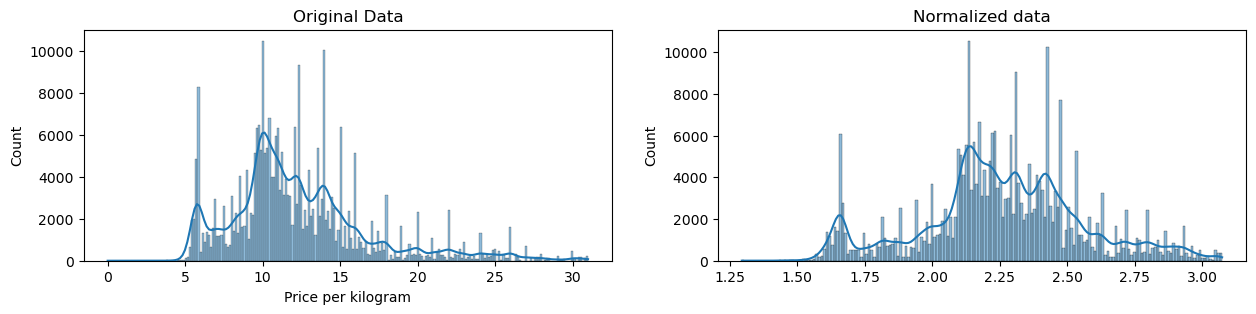

In [107]:
# normalizar los datos exponenciales con boxcox
price2 = data['Price per kilogram'].replace(0,12.32)
price2 = price2.to_numpy()
#type(price2)
#price2.min()
normalized_data = stats.boxcox(price2)

# graficar ambos juntos para comparar
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(data['Price per kilogram'],ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [127]:
df_g2=copy_df_tortilla_2.loc[:,['State','Price per kilogram']]
df_g2 = df_g2.groupby(['State']).mean()
df_g2.head()

#df_g2.columns

,Price per kilogram
State,
Aguascalientes,11.387666
Baja California,13.641510
Baja California Sur,13.058351
Campeche,12.620717
Chiapas,11.511217
